<h1>Group Members:</h1>
<ol>Aditya Kumar</ol>
<ol>Siddharth Bhola</ol>
<ol>Rekha Goverthanam</ol>
<ol>Kailash Umayaorupagam</ol>


In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
from patsy import dmatrices
import random

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: from sklearn.metrics
         ^


In [2]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)    
    A =(((C.T)/(C.sum(axis=1))).T)    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [38]:
df = pd.read_csv('crowd.csv')
col = df.columns.values.tolist()
col.remove('y')

x = "+".join(col)
y, X = dmatrices('y ~' + x, df, return_type='dataframe')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

y_test.y.value_counts()
del x_train['Intercept']
del x_test['Intercept']

<h1>Ridge</h1>

0.9169623846699787
Ridge AUC :  0.5552745047814207


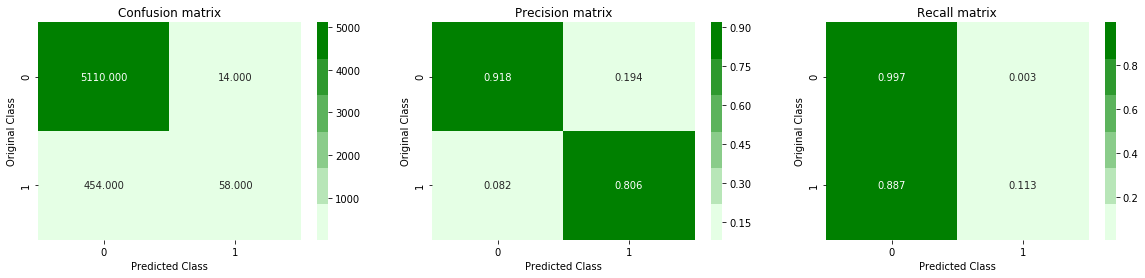

In [39]:
from sklearn.linear_model import RidgeClassifierCV

ridge = RidgeClassifierCV(cv=5)
ridge.fit(x_train, y_train.values.ravel())
ridge_predict = ridge.predict(x_train)
print(accuracy_score(y_train, ridge_predict))  
print("Ridge AUC : ", roc_auc_score(y_train, pd.DataFrame(ridge_predict)))
plot_confusion_matrix(y_train, ridge_predict)  

<h1>Lasso</h1>

0.9361702127659575
Lasso AUC :  0.6494463976491579


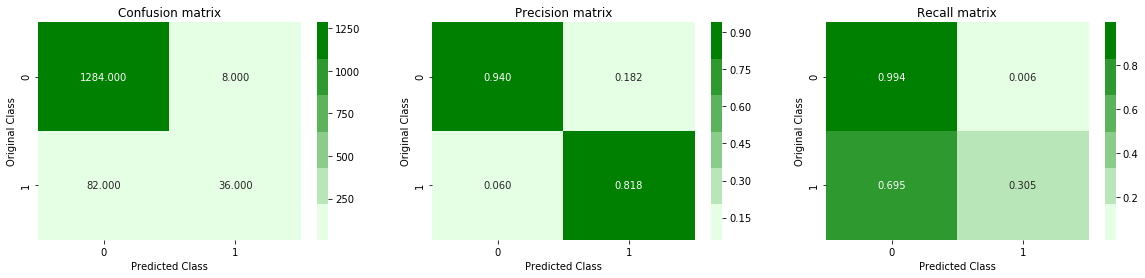

In [40]:
from sklearn.linear_model import LogisticRegressionCV

logistic_regression = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)
logistic_regression.fit(x_train, y_train.values.ravel())
predictions = logistic_regression.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print("Lasso AUC : ", roc_auc_score(y_test, pd.DataFrame(predictions)))
plot_confusion_matrix(y_test, predictions)

<h1>GAM</h1>

C:\Users\adija\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\adija\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\adija\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


0.9446808510638298
GAM AUC :  0.7118447289709818


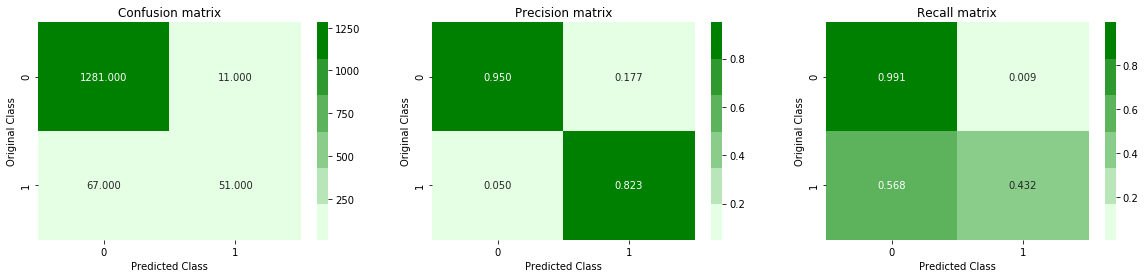

In [41]:
from pygam import LogisticGAM

gam = LogisticGAM()
gam.fit(x_train, y_train.values.ravel())
predict_gam = gam.predict(x_test)
print(accuracy_score(y_test, predict_gam))
print("GAM AUC : ", roc_auc_score(y_test, pd.DataFrame(predict_gam)))
plot_confusion_matrix(y_test, predict_gam)

<h1>Tree</h1>

0.9141843971631206
Trees AUC :  0.7876108516555597


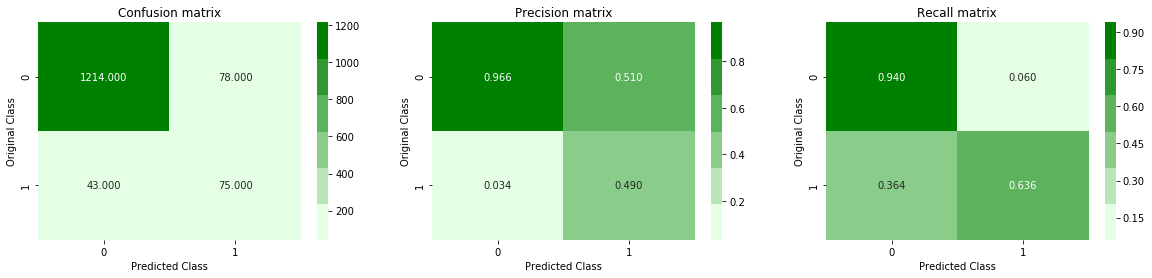

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train.values.ravel())
predict_dtc = dtc.predict(x_test)
print(accuracy_score(y_test, predict_dtc))
print("Trees AUC : ", roc_auc_score(y_test, pd.DataFrame(predict_dtc)))
plot_confusion_matrix(y_test, predict_dtc)

<h1>Random Forest</h1>

0.9560283687943263
Random Forest AUC :  0.8335454163824316


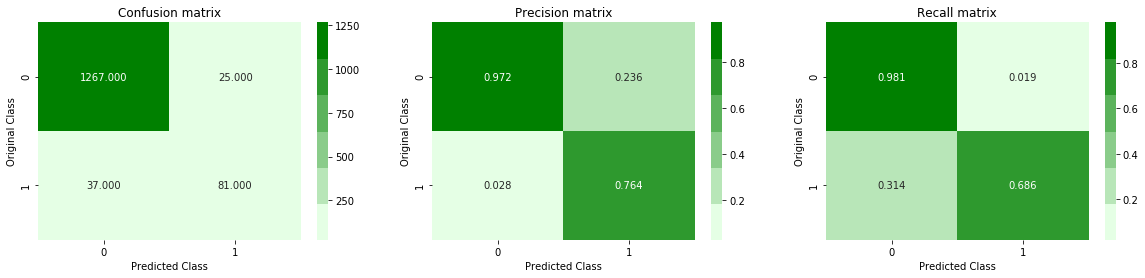

In [43]:
from sklearn.ensemble import RandomForestClassifier

rclf = RandomForestClassifier(n_estimators=300)
rclf.fit(x_train, y_train.values.ravel())
#clf.feature_importances_
pred = rclf.predict(x_test)
print(accuracy_score(y_test, pred)) 

print("Random Forest AUC : ", roc_auc_score(y_test, pred))
plot_confusion_matrix(y_test, pred) 
#cross_val_score(clf, x_train, y_train.values.ravel(), cv=10)

<h1>GBM</h1>

0.9539007092198581
GBM AUC :  0.861247947454844


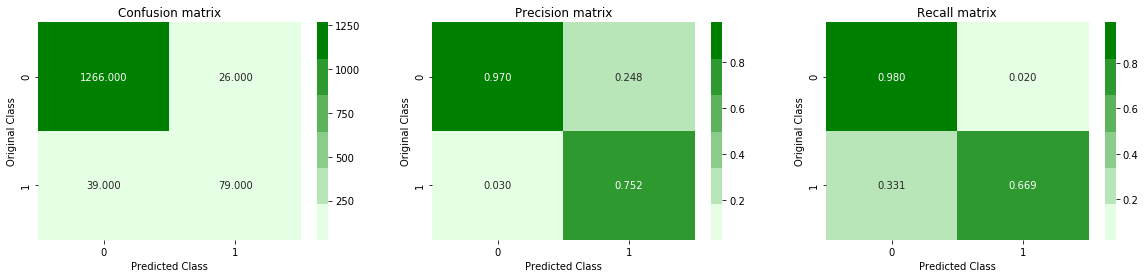

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train.values.ravel())
pred = gbm.predict(x_test)
print(accuracy_score(y_test, pred))  
print("GBM AUC : ", roc_auc_score(list(pred), list(y_test.y)))
plot_confusion_matrix(y_test, pred) 

<h1>Feature Importance</h1>

In [45]:
import pandas as pd
feature_importances = pd.DataFrame({'RF Importance':rclf.feature_importances_, 
                                    'GBM Importance':gbm.feature_importances_, 
                                    'Tree importance':dtc.feature_importances_}, index=x_train.columns).sort_values('RF Importance', ascending=False)
feature_importances

,RF Importance,GBM Importance,Tree importance
votes,0.296193,0.562294,0.418075
comments,0.199287,0.201278,0.137866
diversity,0.088074,0.126003,0.093459
X3,0.041313,0.026015,0.041539
X8,0.038670,0.013349,0.034056
X2,0.036351,0.013926,0.041250
X1,0.035277,0.013662,0.036847
X11,0.032353,0.005436,0.033245
X7,0.032153,0.004479,0.027721
X6,0.031988,0.007895,0.018759


Question 3: 

Answer: Based on the above plots "Votes", "comments","diversity" are the strongest predictors for random forest, trees and GBM.

<h1>Features relations with Y</h1>

In [37]:
library(gam)

crowd = read.csv("crowd.csv")
set.seed(12345)
train = runif(nrow(crowd))<.7   # pick train/test split

fit.gam = gam(y ~ s(votes)+s(comments)+s(diversity)+s(pastaccept)+s(commentsC)+s(X1)+s(X2)+s(X3)+s(X4)+s(X5)+s(X6)+s(X7)+s(X8)+s(X9)+s(X10)+s(X11)+s(age)+s(month), binomial, crowd[train,])
summary(fit.gam)


Call: gam(formula = y ~ s(votes) + s(comments) + s(diversity) + s(pastaccept) + 
    s(commentsC) + s(X1) + s(X2) + s(X3) + s(X4) + s(X5) + s(X6) + 
    s(X7) + s(X8) + s(X9) + s(X10) + s(X11) + s(age) + s(month), 
    family = binomial, data = crowd[train, ])
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-3.9346 -0.2992 -0.2480 -0.2036  3.0498 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 2926.411 on 4943 degrees of freedom
Residual Deviance: 1593.056 on 4870.999 degrees of freedom
AIC: 1739.057 

Number of Local Scoring Iterations: 17 

Anova for Parametric Effects
                Df Sum Sq Mean Sq  F value    Pr(>F)    
s(votes)         1  146.7 146.727 101.5879 < 2.2e-16 ***
s(comments)      1    8.9   8.918   6.1743 0.0129954 *  
s(diversity)     1   12.9  12.888   8.9231 0.0028298 ** 
s(pastaccept)    1    3.8   3.769   2.6094 0.1062967    
s(commentsC)     1    0.3   0.261   0.1807 0.6707497    
s(X1)            1   14.1  14.073  

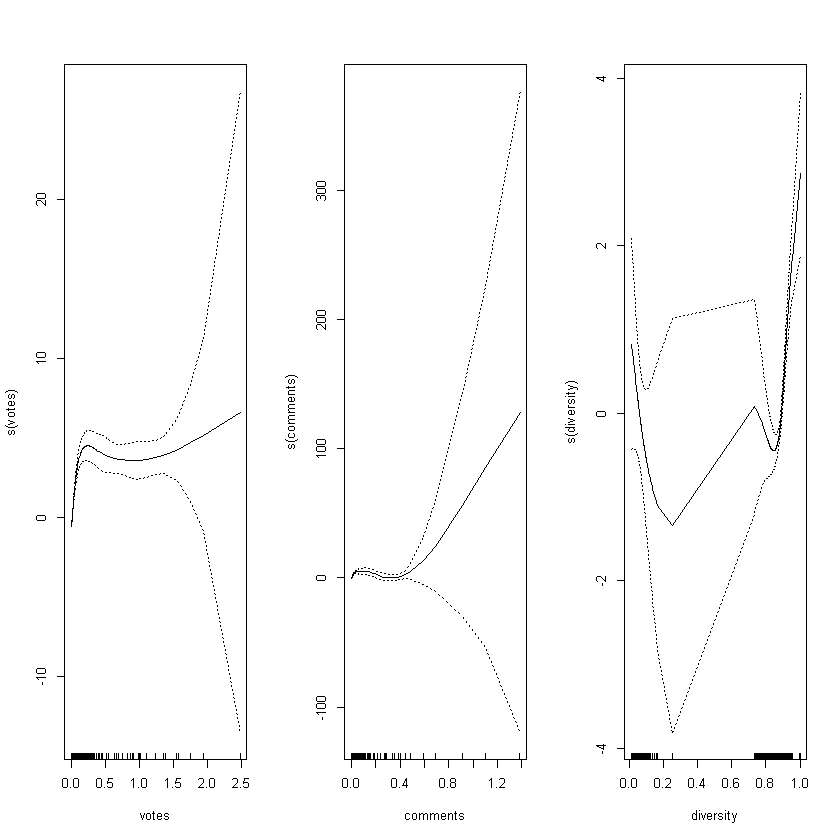

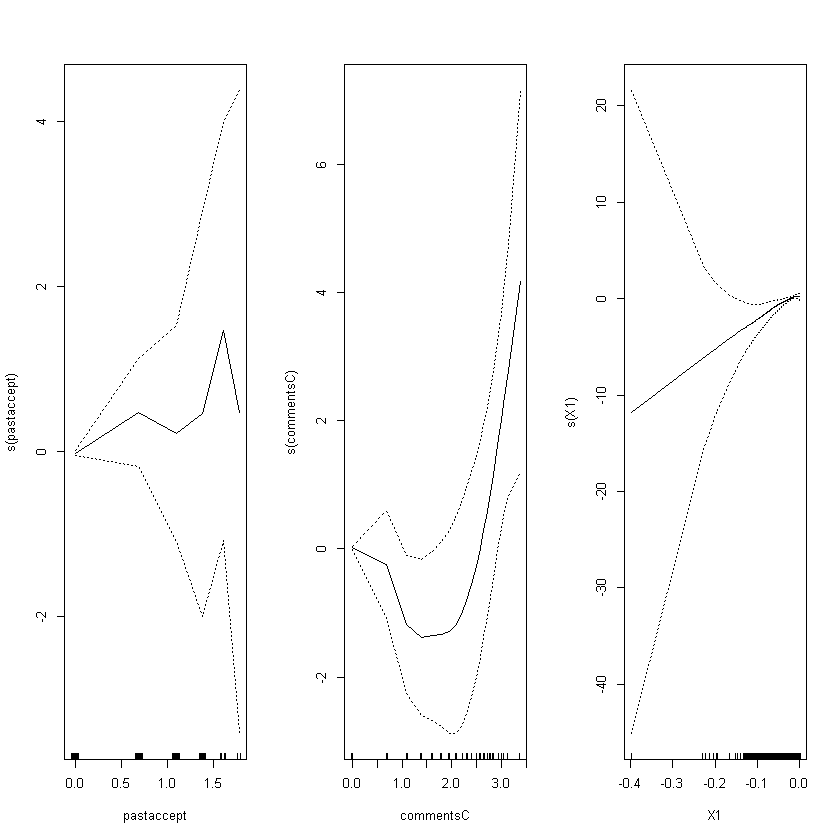

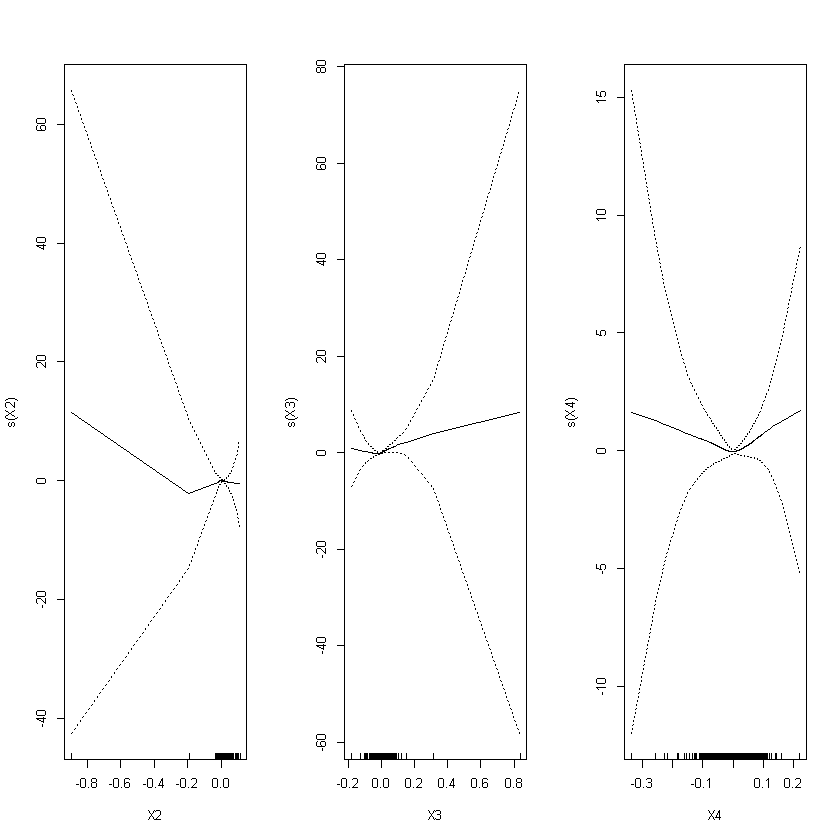

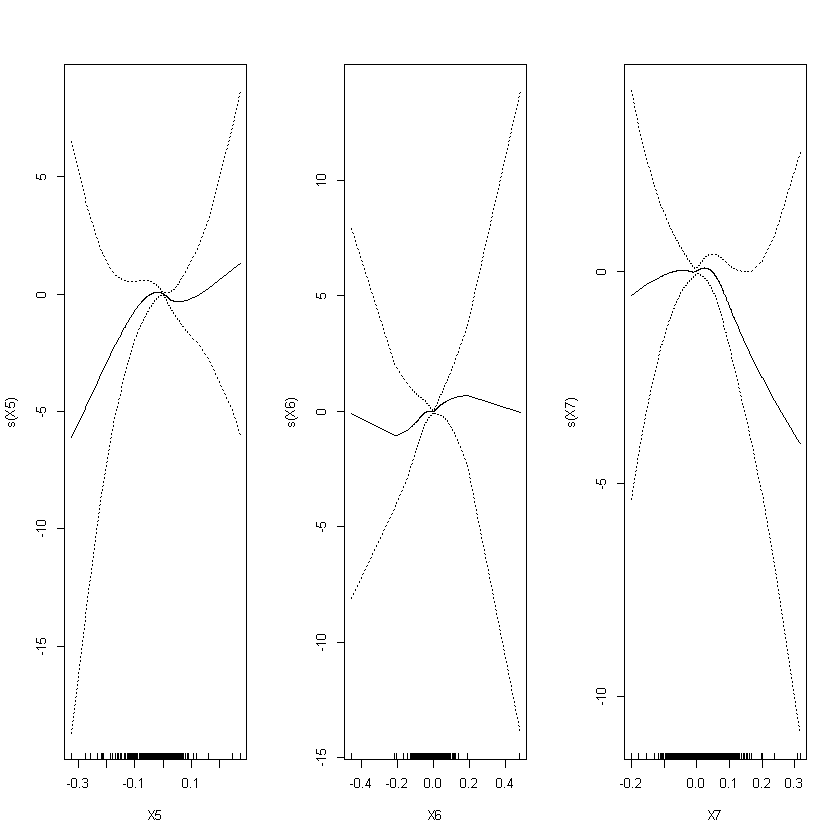

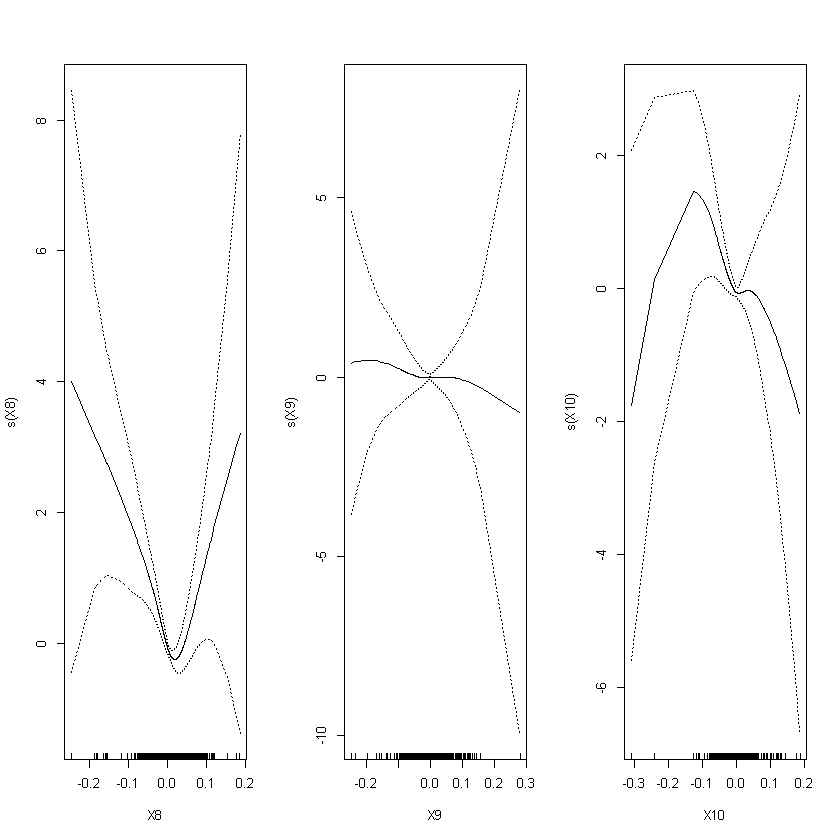

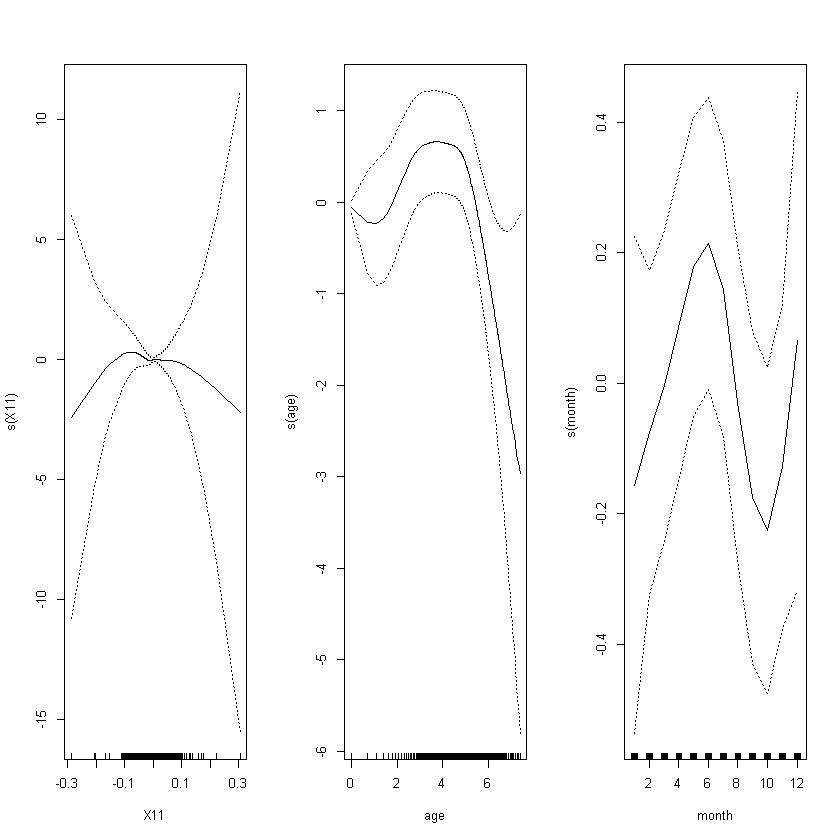

In [38]:
par(mfrow=c(1,3))
plot(fit.gam, se=T)

<h2>From above graphs we can say below relations of strongest predictors with y.</h2>
<h3>
    <ol>Votes: Increasing returns</ol>
    <ol>Comments: Increasing returns</ol>
    <ol>Diversity: U-shaped returns</ol>
</h3>